In [98]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [99]:
df=pd.read_csv('movies.csv')

In [100]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [101]:
#lets see if any column has any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [102]:
#We can see that Budget column has many null values
#lets drop the rows which contain null values
#We will have our dataset reduced by approx 30%

df = df.dropna()

In [103]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

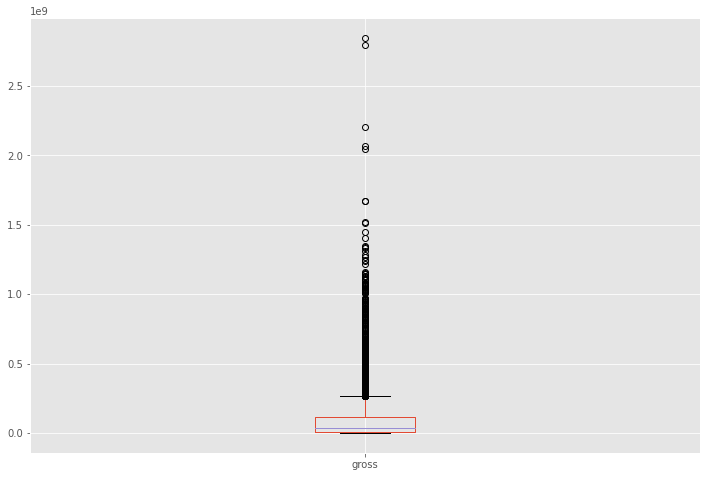

In [104]:
# Are there any Outliers in the dataset?
df.boxplot(column=['gross'])

Data Cleaning

In [105]:
df['budget']=df['budget'].astype('int64')

df['gross']=df['gross'].astype('int64')

In [106]:
df

Output hidden; open in https://colab.research.google.com to view.

In [107]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [108]:
df=df.drop(['year'],axis=1)

In [110]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

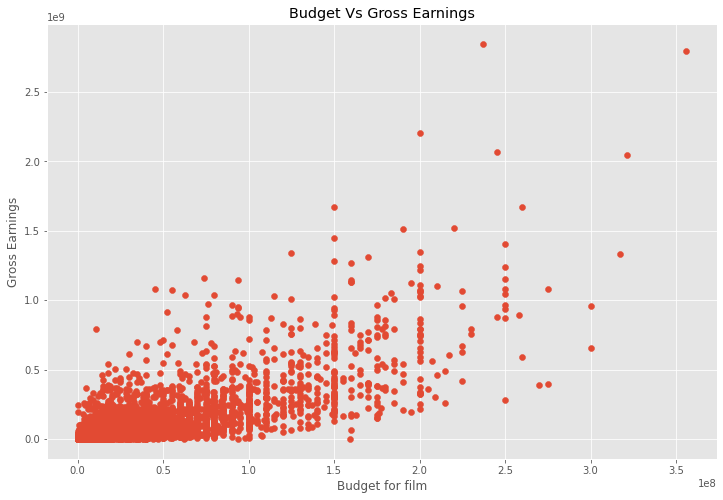

In [111]:
#Scatter Plot of budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget Vs Gross Earnings')

plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')

plt.show()

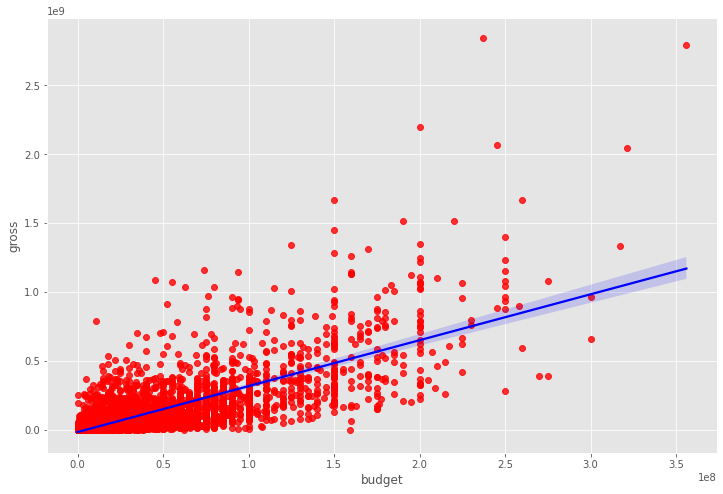

In [112]:
#regplot of budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [113]:
df.corr()

#We have 3 methods for calculating correlation-Pearson,Kendall and Spearman with Pearson being the default method.
#Here,we have used the Pearson method because we have observed a linear relationship between the variables and these are paired observations.We cannot use Kendall because the sample size is big.Since these variables aren't ranked,so it is not advisable to use Spearman method

#High Correlation between budget and gross

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


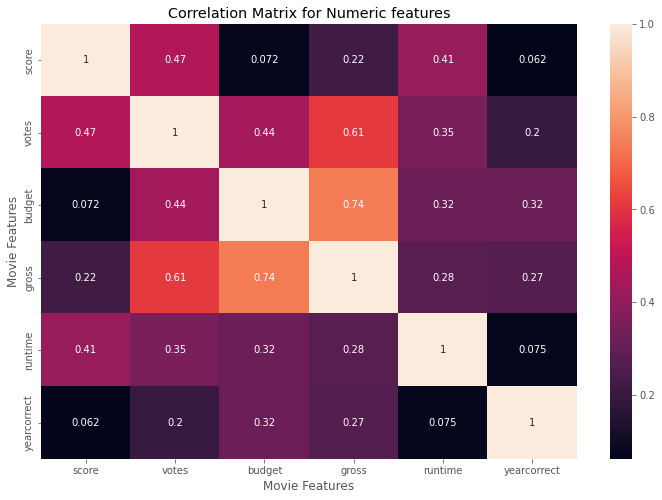

In [114]:
correlation_matrix=df.corr()

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [115]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[['gross']].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [116]:
df.groupby(['company', 'yearcorrect'])[["gross"]].sum()

gross
company                                            yearcorrect            
"DIA" Productions GmbH & Co. KG                    2003           44350926
"Weathering With You" Film Partners                2020          193457467
.406 Production                                    1997              10580
1492 Pictures                                      1996          129832389
                                                   1999           87423861
1818 Productions                                   1983           12232628
19 Entertainment                                   2003            4928883
1978 Films                                         2017           40656399
1984 Private Defense Contractors                   2014           58834384
2 Loop Films                                       2003             264349
2.0 Entertainment                                  2019          122810399
2.4.7. Films                                       2008           22783978
2003 Productions                                   2005           69424389
20th Century Studios                               2020          111105497
21 Laps Entertainment                              2014           41296320
                                                   2018           41142379
21st Century Film Corporation                      1990            5835247
21st Century Films                                 1994            1702394
25th Hour Productions                              2003           23932055
26 Films                                           2009           20458873
2929 Productions                                   2008           14007547
                                                   2009           21946121
                                                   2015            5092129
2DUX²                                              2017             678150
                                                   2018          197744377
3 Arts Entertainment                               1996           60209334
                                                   1997           75812433
                                                   2001           71186502
                                                   2011             649626
                                                   2013            3909596
                                                   2014          161459297
                                                   2015           36606743
                                                   2019           22386555
3 Miles Apart Productions Ltd.                     1999            8408835
3311 Productions                                   2017            5042014
360 Pictures                                       2007            9669758
3Mark Entertainment                                2002            4760014
4 Kids Entertainment                               2000          133949270
40 Acres & A Mule Filmworks                        1986            7137502
                                                   1989           37295445
                                                   1995           15403436
                                                   1999           34573780
                                                   2000           27728118
                                                   2004            1526951
4Kids Entertainment                                2007           95802916
7 Arts International                               1999             206128
7 Films Cinéma                                     2002            3033646
88 Productions                                     1990           10005969
888 Productions                                    1990          201965915
900 Films                                          2003            5141166
98 MPH Productions                                 2002           80693537
A Band Apart                                       1995            3734870
                   

In [117]:
#Getting the Top 15 Companies with Highest Gross Revenue Earned along with the corresponding year

CompanyGrossSum = df.groupby(['company', 'yearcorrect'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','yearcorrect'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                yearcorrect
Walt Disney Pictures   2019           5773131804
Marvel Studios         2018           4018631866
Universal Pictures     2015           3834354888
Twentieth Century Fox  2009           3793491246
Walt Disney Pictures   2017           3789382071
Paramount Pictures     2011           3565705182
Warner Bros.           2011           3168551343
Walt Disney Pictures   2010           3104474158
Paramount Pictures     2014           3071298586
Columbia Pictures      2019           2932757449
                       2006           2918469353
Marvel Studios         2019           2797501328
Warner Bros.           2018           2774168962
                       2005           2773019821
                       2007           2758633559
Name: gross, dtype: int64

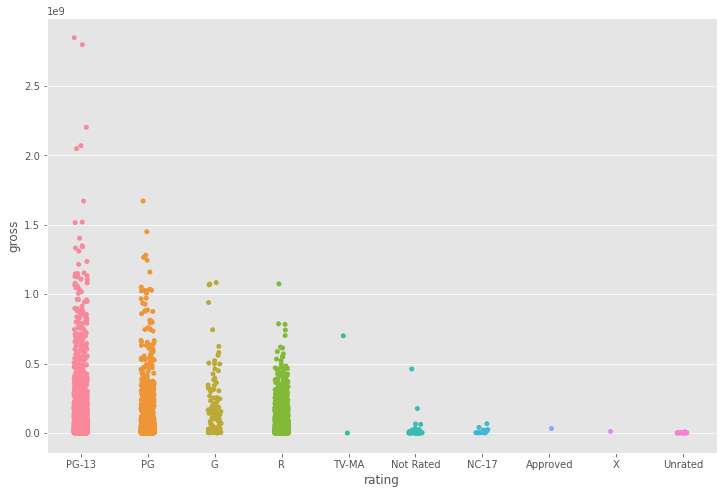

In [119]:
sns.stripplot(x="rating", y="gross", data=df)

In [120]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

Output hidden; open in https://colab.research.google.com to view.

In [121]:
df_numerized.corr(method='pearson')

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


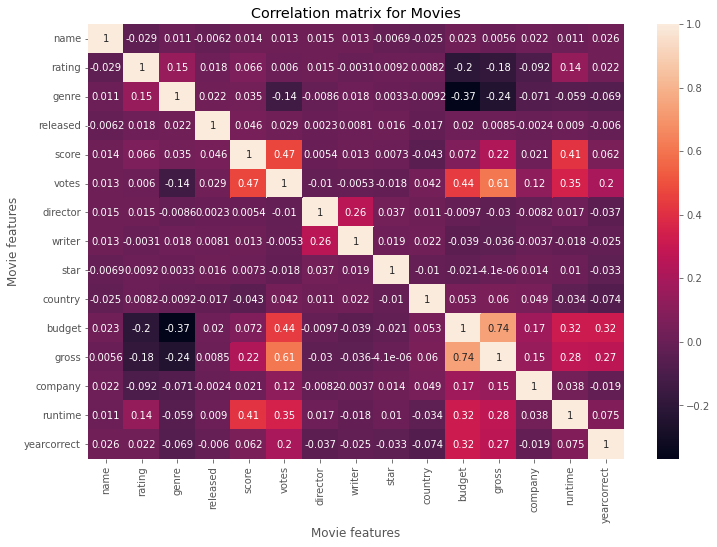

In [122]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [123]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
 

In [124]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
company      genre         -0.071334
genre        company       -0.071334
yearcorrect  genre         -0.069147
genre        yearcorrect   -0.069147
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     yearcorrect   -0.037371
yearcorrect  director      -0.037371
writer       gross         -0.035885
g

In [125]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


**Thus,Votes and Budgets are the 2 quantities which are highly correlated to the film's success,ie its gross revenue**